In [1]:
%pylab inline
import numpy as np

temp_out = 70.0
r = 0.9

def cooling_law(temp_start, walk_time):
    return temp_out + (temp_start - temp_out) * r ** walk_time

cooling_law(185.0, 10.0)

Populating the interactive namespace from numpy and matplotlib


110.0980206115

In [2]:
times = arange(0., 21., 5.)
temperatures = cooling_law(185., times)
temperatures

array([ 185.        ,  137.90635   ,  110.09802061,   93.67748019,
         83.98131528])

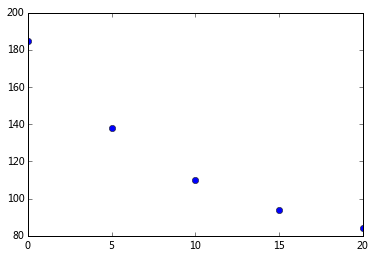

In [3]:
plot(times, temperatures, 'o')

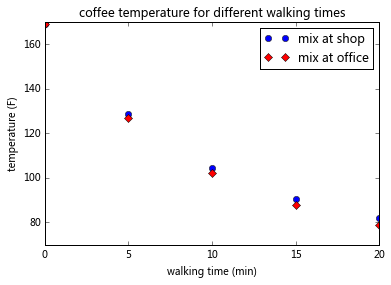

In [4]:
def temp_mixture(t1, v1, t2, v2):
    return (t1 * v1 + t2 * v2) / (v1 + v2)

temp_coffee = 185.
temp_cream =40.

vol_coffee = 8.
vol_cream = 1.
initial_mix_at_shop = temp_mixture(temp_coffee, vol_coffee, temp_cream, vol_cream)
mix_at_shop = cooling_law(initial_mix_at_shop, times)

unmixed_coffee = cooling_law(temp_coffee, times)
mix_at_office = temp_mixture(unmixed_coffee, vol_coffee, temp_cream, vol_cream)

plot(times, mix_at_shop, 'o')
plot(times, mix_at_office, 'D', color='r')

title('coffee temperature for different walking times')
xlabel('walking time (min)')
ylabel('temperature (F)')
legend(['mix at shop', 'mix at office'])

In [5]:
temp_coffee = 185.
vol_coffee = 8.
vol_cream = 1.
walk_time = 10.0
r = 0.9

def temp_diff(temp_cream, temp_out):
    temp_start = temp_mixture(temp_coffee, vol_coffee, temp_cream, vol_cream)
    mix_at_shop = temp_out + (temp_start - temp_out) * r ** walk_time
    temp_start = temp_coffee
    temp_unmixed = temp_out + (temp_start - temp_out) * r ** walk_time
    mix_at_office = temp_mixture(temp_unmixed, vol_coffee, temp_cream, vol_cream)
    return mix_at_shop - mix_at_office

cream_temp = arange(40., 51., 1.)
outside_temp = arange(35., 60., 1.)

cream_values, outside_values = meshgrid(cream_temp, outside_temp)
temp_diff_cream_outside = temp_diff(cream_values, outside_values)

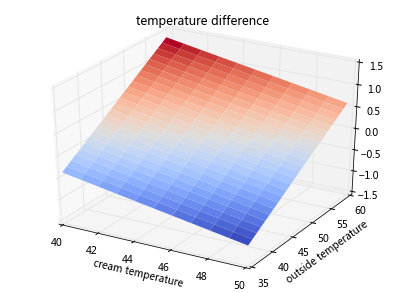

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = figure()
fig.set_size_inches(7, 5)

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(cream_values, outside_values, temp_diff_cream_outside,
                rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)

xlabel('cream temperature')
ylabel('outside temperature')
title('temperature difference');